In [29]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import metrics
from scipy.special import factorial
from scipy.stats.distributions import chi2

import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [30]:
# mN=0.2
mN=1

modes_dt = {
            1: {'mode': f'../data/features/sig_Maj_E-{cm}_m-{int(mN*1000)}_reco.root', 'yields': 100},
#             2: {'mode': f'../data/features/sig_Dir_E-{cm}_m-{mN*1000}_reco.root', 'yields': Lumi*Xsec_D[cm][mN]*eff_D*V2}, 
            3: {'mode': f'../data/features/bg_aMu_qql_E-3_reco.root', 'yields': 100},
            4: {'mode': f'../data/features/bg_MuMu_qqll_E-3_reco.root', 'yields': 100},
           }

NameError: name 'cm' is not defined

In [3]:
def load_train_test(modes_dt, size=0.5):
    np.random.seed(9)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    num_lt = []
    
    # loop over different modes
    for i, (k, v) in enumerate(modes_dt.items()):
        file = uproot.open(v['mode'])
        df_i = pd.DataFrame(np.array(file['t']['features'].array()))
        df_i['target'] = k    # add the target label
        df_i['weight'] = v['yields']/len(df_i)
#         print(k, v)
        num_lt.append(len(df_i))

        # shuffle the index for training and testing sets
        idx = df_i.index.tolist()
        np.random.shuffle(idx)
        
        # cut according to the fraction
        cut = int(np.ceil(len(idx) * size))
        df_train_i = df_i.loc[idx[:cut]]
        df_test_i = df_i.loc[idx[cut:]]
        
        # Put to the global dataframs
        df_train = pd.concat([df_train, df_train_i])
        df_test = pd.concat([df_test, df_test_i])
    
    df_train.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    
    print('train size: {} ({:.2f}%); test size: {} ({:.2f}%)'.format(len(df_train), 100*len(df_train)/(len(df_train)+len(df_test)), len(df_test), 100*len(df_test)/(len(df_train)+len(df_test))))
    print('data points per mode: ',num_lt)
    return df_train, df_test

    

In [92]:
tr_te_size = 0
df_train, df_test = load_train_test(modes_dt, tr_te_size)

df_train_o, df_test_o = df_train.copy(), df_test.copy()

train size: 0 (0.00%); test size: 593 (100.00%)
data points per mode:  [393, 100, 100]


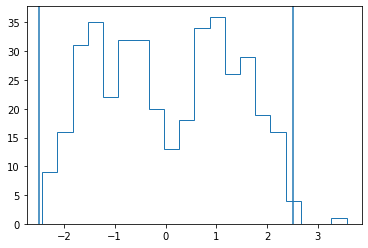

In [93]:
plt.hist(df_test[df_test.target==1]['etaLepTrue'], bins=20, histtype='step');
plt.axvline(2.5)
plt.axvline(-2.5)

In [96]:
plt.hist(df_test[df_test.target==4]['mNTrue']);

KeyError: 'mNTrue'

In [165]:

file = uproot.open('../testing_qqll.root')
df_i = pd.DataFrame(np.array(file['t']['features'].array()))

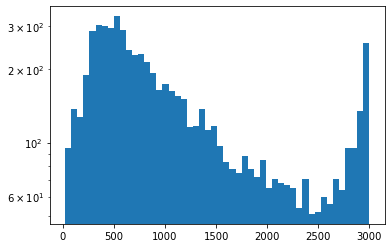

In [123]:

plt.hist(df_i['mN'],bins=50);
plt.yscale('log')

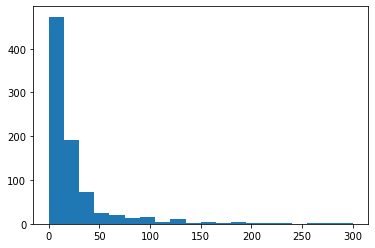

In [124]:
plt.hist(df_i[df_i['mN']>2500]['ptLep'], bins=20, range=[0,300]);

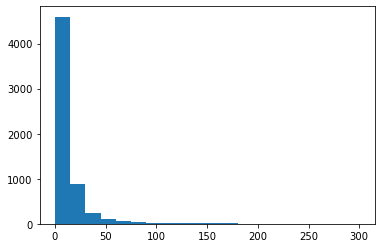

In [125]:
plt.hist(df_i[df_i['mN']<2500]['ptLep'], bins=20, range=[0,300]);

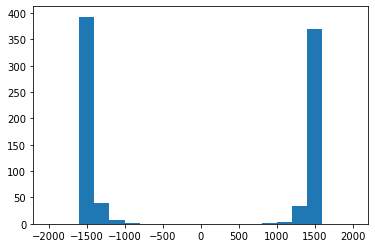

In [126]:
plt.hist(df_i[df_i['mN']>2500]['pzLep'], bins=20, range=[-2000,2000]);

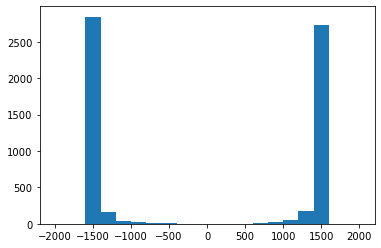

In [127]:
plt.hist(df_i[df_i['mN']<2500]['pzLep'], bins=20, range=[-2000,2000]);

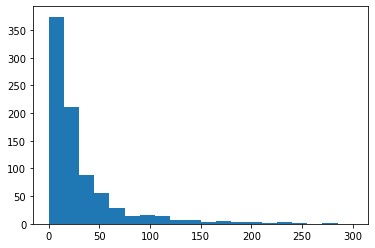

In [128]:
plt.hist(df_i[df_i['mN']>2500]['ptJJ'], bins=20, range=[0,300]);

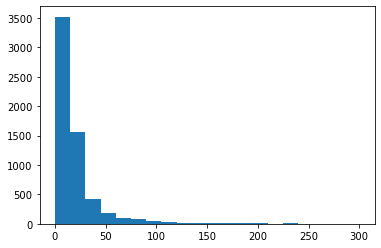

In [129]:
plt.hist(df_i[df_i['mN']<2500]['ptJJ'], bins=20, range=[0,300]);

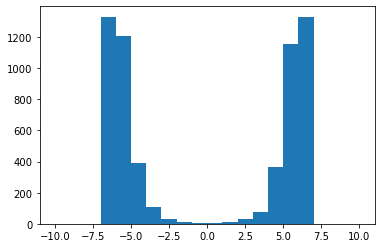

In [130]:
plt.hist(df_i[df_i['mN']<2500]['etaLep'], bins=20, range=[-10,10]);

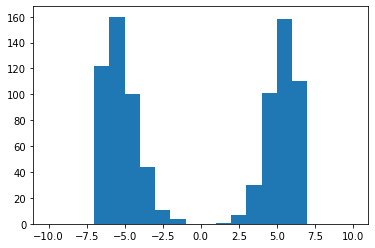

In [131]:
plt.hist(df_i[df_i['mN']>2500]['etaLep'], bins=20, range=[-10,10]);

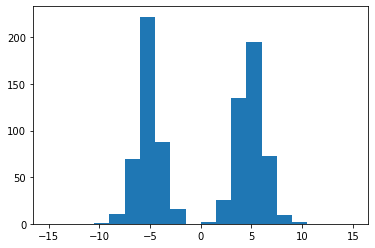

In [132]:
plt.hist(df_i[df_i['mN']>2500]['etaJJ'], range=[-15,15], bins=20);

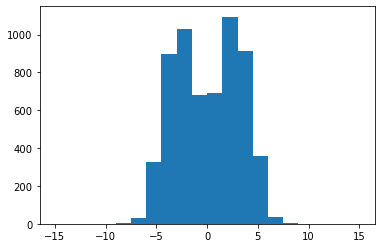

In [133]:
plt.hist(df_i[df_i['mN']<2500]['etaJJ'], range=[-15,15], bins=20);

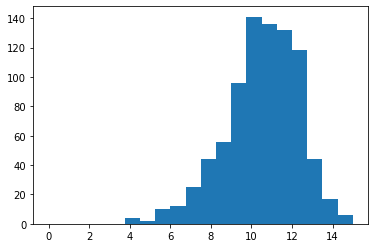

In [134]:
plt.hist(df_i[df_i['mN']>2500]['DeltaRjjl'], range=[0,15], bins=20);

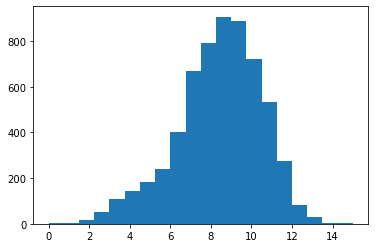

In [135]:
plt.hist(df_i[df_i['mN']<2500]['DeltaRjjl'], range=[0,15], bins=20);

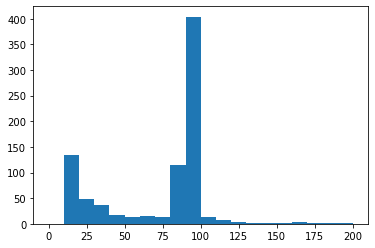

In [148]:
plt.hist(df_i[df_i['mN']>2500]['mJJ'], range=[0,200], bins=20);

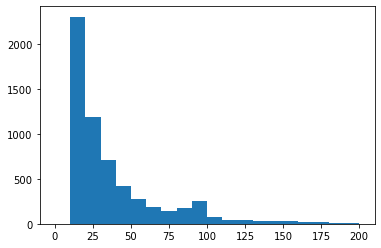

In [137]:
plt.hist(df_i[df_i['mN']<2500]['mJJ'], range=[0,200], bins=20);

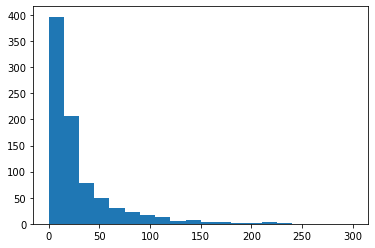

In [138]:
plt.hist(df_i[df_i['mN']>2500]['ptl2'], bins=20, range=[0,300]);

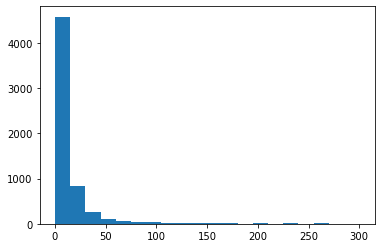

In [139]:
plt.hist(df_i[df_i['mN']<2500]['ptl2'], bins=20, range=[0,300]);

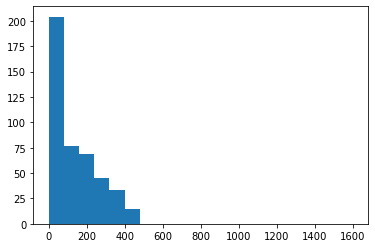

In [147]:
plt.hist(df_i[df_i['mN']>2500]['pzl2'], bins=20, range=[0,1600]);

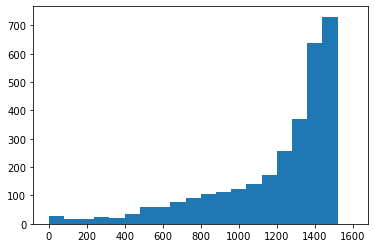

In [146]:
plt.hist(df_i[df_i['mN']<2500]['pzl2'], bins=20, range=[0,1600]);

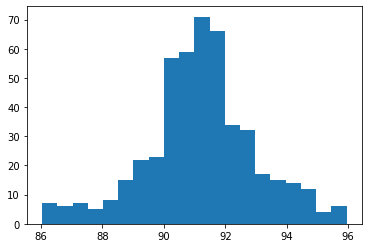

In [163]:
plt.hist(df_i[(df_i['mN']>2500) & (df_i['mJJ']<91+5) & (df_i['mJJ']>91-5)]['mJJ'], bins=20);

480

In [164]:
len(df_i[(df_i['mN']>2500) & (df_i['mJJ']<91+5) & (df_i['mJJ']>91-5)]['mJJ']) / len(df_i[(df_i['mN']>2500)]['mJJ'])

0.5660377358490566

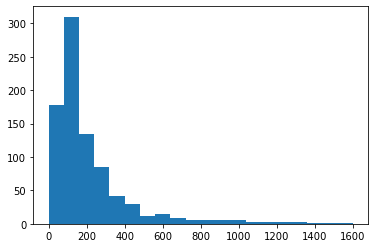

In [166]:
plt.hist(df_i[df_i['mN']>2500]['mJJl2'], bins=20, range=[0,1600]);

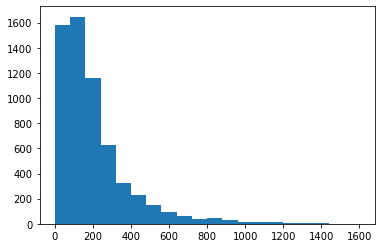

In [167]:
plt.hist(df_i[df_i['mN']<2500]['mJJl2'], bins=20, range=[0,1600]);